## Temporal Analysis Notebook

We'll focus on time period based analysis here.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
%matplotlib inline

### Helper Functions

In [3]:
with open('../Cleaned-Data/cleaned_texts_pdf.json') as json_file:
    cleaned_texts_pdf = json.load(json_file)
with open('../Cleaned-Data/cleaned_texts_epub_txt.json') as json_file:
    cleaned_texts_epub_txt = json.load(json_file)

cln_txts_eu_dict = {}

#the keys in our input json files are file names with extensions. 
#remove extensions so that the dictionary keys match the IDs in the metadata table.
for key, val in cleaned_texts_pdf.items():
    new_key = key.split('.')[0]
    if "scanned" not in new_key:
        cln_txts_eu_dict[new_key] = val
for key, val in cleaned_texts_epub_txt.items():
    new_key = key.split('.')[0]
    if "scanned" not in new_key:
        cln_txts_eu_dict[new_key] = val

with open('../Cleaned-Data/cleaned_texts_dystopia.json') as json_file:
    cleaned_texts_dystopia = json.load(json_file)
    
cln_txts_dys_dict = {}
    
for key, val in cleaned_texts_dystopia.items():
    new_key = key.split('.')[0]
    if "scanned" not in new_key:
        cln_txts_dys_dict[key.split('.')[0]] = val
    
# #uncomment if it's convenient to have a list of the texts
# cln_txts_eu_list = [text for text in cln_txts_eu_dict.values()]
# cln_txts_dys_list = [text for text in cln_txts_dys_dict.values()]

In [4]:
book_info_eutopia = pd.read_csv("../Biblists/eutopia_september9.csv")
book_info_eutopia = pd.concat([book_info_eutopia, pd.read_csv("../Biblists/bib_list_cdj_july6.csv")], ignore_index=True, verify_integrity = True)

book_info_dystopia = pd.read_csv("../Biblists/dystopia_september18.csv")

del book_info_eutopia['Unnamed: 0']
del book_info_dystopia['Unnamed: 0']

In [5]:
book_info_eutopia.columns

Index(['author', 'title', 'url', 'ID', 'added', 'jode_notes', 'keywords',
       'abstract', 'address', 'publisher', 'month', 'year', 'howpublished',
       'ENTRYTYPE', 'editor', 'pages', 'isbn', 'note', 'volume', 'issn'],
      dtype='object')

In [6]:
book_info_eutopia = book_info_eutopia[~book_info_eutopia['ID'].isna()]
book_info_eutopia['ID'] = book_info_eutopia.ID.astype('str')
book_info_eutopia.drop_duplicates(inplace = True, subset = ['ID', 'year', 'author', 'title', 'keywords', 'note'])

In [7]:
book_info_dystopia = book_info_dystopia[~book_info_dystopia['ID'].isna()]
book_info_dystopia['ID'] = book_info_dystopia.ID.astype('str')
book_info_dystopia.drop_duplicates(inplace = True, subset = ['ID', 'year', 'author', 'title', 'keywords', 'note'])

In [8]:
def get_texts_year_range(year_range_lo, year_range_hi, book_info = book_info_eutopia, 
                         text_dict = cln_txts_eu_dict):
    
    ids = book_info[(book_info.year > year_range_lo) & (book_info.year <= year_range_hi)].ID.values
    texts = [text_dict[key] for key in ids if key in text_dict]
    
    print('texts in date range: ' + str(len(texts)))
    return texts
    
def get_texts_w_keyword(kw, book_info = book_info_eutopia, text_dict = cln_txts_eu_dict):
    
    possible_keywords = ['Aotearoa/New Zealand author', 'Female author', 'English author', 'Irish author', 
     'Male author', 'African author', 'Transgender author', 'US author', 'UK author', 
     'Canadian author', 'Latinx author', 'African American author', 'Cuban-American author',
     'Scottish author', 'Indian author', 'French author', 'Australian author', 
     'Czech author', 'Northern Ireland author', 'Israeli author', 'Nigerian author', 
     'South African author', 'Iranian author', 'Botswanan author', 'Armenian author', 
     'Italian author', 'German author', 'Welsh author', 'Slovenian author']
        
    if kw not in possible_keywords:
        print('no texts labeled with that keyword. possible keywords are:')
        print(possible_keywords)

    bi_no_na = book_info[~book_info.keywords.isna()]
    ids = bi_no_na[bi_no_na.keywords.str.contains(kw)].ID.values
    texts = [text_dict[key] for key in ids if key in text_dict]

    print('texts with keyword ' + kw + ': ' + str(len(texts)))
    return texts

    pd.Series.dropna
    book_info.keywords.dropna()

In [9]:
early_scifi = get_texts_year_range(1700, 1850)

texts in date range: 50


In [10]:
romantic_scifi = get_texts_year_range(1850, 1900)

texts in date range: 197


In [11]:
ww_scifi = get_texts_year_range(1900, 1945)

texts in date range: 196


In [12]:
coldwar_scifi = get_texts_year_range(1945, 1990)

texts in date range: 125


In [13]:
contemp_scifi = get_texts_year_range(1990, 2022)

texts in date range: 143


In [14]:
full_texts = get_texts_year_range(1700, 2022)

texts in date range: 711


In [15]:
full_texts[0]

['best',
 'way',
 'win',
 'hide',
 'seek',
 'elsbeth',
 'thought',
 'play',
 'pretended',
 'play',
 'kids',
 'counting',
 'left',
 'developed',
 'reputation',
 'good',
 'hider',
 'flattering',
 'stupid',
 'figure',
 'game',
 'appearance',
 'stupidity',
 'meant',
 'suggested',
 'game',
 'agree',
 'confident',
 'rid',
 'hours',
 'stupidity',
 'thought',
 'best',
 'camouflage',
 'world',
 'thing',
 'better',
 'youth',
 'looking',
 'young',
 'dumb',
 'got',
 'predator',
 'proof',
 'fence',
 'liked',
 'questioned',
 'fished',
 'clipboard',
 'backpack',
 'pretended',
 'assignment',
 'school',
 'failed',
 'worked',
 'kids',
 'wise',
 'young',
 'dumb',
 'trick',
 'elsbeth',
 'abandoned',
 'games',
 'beach',
 'ran',
 'girl',
 'deceptive',
 'apologised',
 'collision',
 'sorry',
 'liked',
 'violence',
 'elsbeth',
 'said',
 'elsbeth',
 'following',
 'girl',
 'nose',
 'wrinkled',
 'coral',
 'said',
 'tones',
 'great',
 'disgust',
 'yuck',
 'corals',
 'class',
 'said',
 'elsbeth',
 'sweetly',
 'poli

## TFIDF plots

In [46]:
from gensim.models import TfidfModel


In [47]:
from gensim.corpora import Dictionary

In [49]:
dct = Dictionary(full_texts) 

In [ ]:
full_corpus = [dct.doc2bow(line) for line in full_texts]

In [ ]:
tfidf_model = TfidfModel(full_corpus)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [51]:
tfidf_vectorizer = TfidfVectorizer()

In [52]:
full_texts_joined = []

In [53]:
for text in full_texts:
    full_texts_joined.append(' '.join(text))

In [54]:
tfidf = tfidf_vectorizer.fit(full_texts_joined)

In [55]:
tf_idf_corpus = tfidf_vectorizer.transform(full_texts_joined).toarray()

In [56]:
def vecs_labels_tfidf(texts, label):
    vecs = []
    labels = []
    joined_texts = []
    for text in texts:
        labels.append(label)
        joined_texts.append(' '.join(text))
    vecs = tfidf_vectorizer.transform(joined_texts).toarray()
    return vecs, labels

In [57]:
early_vecs, early_labels = vecs_labels_tfidf(early_scifi, "Early")

In [58]:
romantic_vecs, romantic_labels = vecs_labels_tfidf(romantic_scifi, "Romantic")

In [59]:
ww_vecs, ww_labels = vecs_labels_tfidf(ww_scifi, "World War")

In [60]:
coldwar_vecs, coldwar_labels = vecs_labels_tfidf(coldwar_scifi, "Cold War")

In [61]:
contemp_vecs, contemp_labels = vecs_labels_tfidf(contemp_scifi, "Contemp")

In [64]:
from yellowbrick.text import TSNEVisualizer, UMAPVisualizer

In [65]:
umap_model = UMAPVisualizer()

In [66]:
labels = np.array(early_labels + romantic_labels + ww_labels + coldwar_labels + contemp_labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:title={'center':'UMAP Projection of 711 Documents'}>

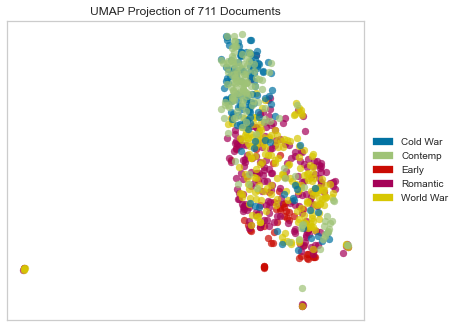

In [67]:
umap_model.fit(np.concatenate((early_vecs, romantic_vecs, ww_vecs, coldwar_vecs, contemp_vecs), axis=0), labels)
umap_model.show(outpath="tfidf.pdf")

## Word Embeddings Temporal

In [16]:
import pandas as pd
import gensim
import copy
import numpy as np

In [17]:
import gensim.models as models

In [18]:
def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """
    Original script: https://gist.github.com/quadrismegistus/09a93e219a6ffc4f216fb85235535faf
    Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
        
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """

    # patch by Richard So [https://twitter.com/richardjeanso) (thanks!) to update this code for new version of gensim
    # base_embed.init_sims(replace=True)
    # other_embed.init_sims(replace=True)

    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)
    # help
    in_base_embed.wv.fill_norms(force=True)
    in_other_embed.wv.fill_norms(force=True)


    # get the (normalized) embedding matrices
    base_vecs = in_base_embed.wv.get_normed_vectors()
    other_vecs = in_other_embed.wv.get_normed_vectors()

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one, i.e. multiplying the embedding matrix by "ortho"
    other_embed.wv.vectors = (other_embed.wv.vectors).dot(ortho)    
    
    return other_embed

def intersection_align_gensim(m1, m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1 & vocab_m2
    if words: common_vocab &= set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1 - common_vocab and not vocab_m2 - common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count") + m2.wv.get_vecattr(w, "count"), reverse=True)
    # print(len(common_vocab))

    # Then for each model...
    for m in [m1, m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.key_to_index[w] for w in common_vocab]
        old_arr = m.wv.vectors
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.vectors = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        new_key_to_index = {}
        new_index_to_key = []
        for new_index, key in enumerate(common_vocab):
            new_key_to_index[key] = new_index
            new_index_to_key.append(key)
        m.wv.key_to_index = new_key_to_index
        m.wv.index_to_key = new_index_to_key
        
        print(len(m.wv.key_to_index), len(m.wv.vectors))
        
    return (m1,m2)

In [19]:
def compareModels_pretrained(embeddings_raw):
    cats = list(embeddings_raw.keys())
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_aligned

In [20]:
from gensim.models import Word2Vec

In [21]:
w2vmodel_early = Word2Vec(
        early_scifi,
        vector_size=150,
        window=15)

In [22]:
w2vmodel_romantic = Word2Vec(
        romantic_scifi,
        vector_size=150,
        window=15)

In [23]:
w2vmodel_ww = Word2Vec(
        ww_scifi,
        vector_size=150,
        window=15)

In [24]:
w2vmodel_coldwar = Word2Vec(
        coldwar_scifi,
        vector_size=150,
        window=15)

In [25]:
w2vmodel_contemp = Word2Vec(
        contemp_scifi,
        vector_size=150,
        window=15)

In [250]:
w2vmodel_contemp.wv.most_similar("woman")

[('man', 0.9465445876121521),
 ('girl', 0.8864824175834656),
 ('looked', 0.8804785013198853),
 ('little', 0.879188060760498),
 ('smile', 0.87822425365448),
 ('behold', 0.8763706088066101),
 ('boy', 0.8694101572036743),
 ('masquerade', 0.8692941665649414),
 ('appalled', 0.8650129437446594),
 ('baby', 0.8592351078987122)]

In [251]:
w2vmodel_coldwar.wv.most_similar("woman")

[('man', 0.9198076725006104),
 ('young', 0.9066603779792786),
 ('mother', 0.8763818740844727),
 ('girl', 0.8688393235206604),
 ('child', 0.8487613201141357),
 ('nun', 0.8219956755638123),
 ('beautiful', 0.8208642601966858),
 ('father', 0.8176007866859436),
 ('girls', 0.8174229860305786),
 ('implored', 0.8156296610832214)]

In [26]:
embeddings_dict = {"early":w2vmodel_early, "romantic":w2vmodel_romantic, "ww":w2vmodel_ww, 
                   "coldwar":w2vmodel_coldwar, "contemp":w2vmodel_contemp}

In [27]:
comparedEmbeddings = compareModels_pretrained(embeddings_dict)

20918 20918
20918 20918
19978 19978
19978 19978
16771 16771
16771 16771
15249 15249
15249 15249
19978 19978
19978 19978
16771 16771
16771 16771
15249 15249
15249 15249
15249 15249
15249 15249
15249 15249
15249 15249


In [28]:
# comparedEmbeddings

In [29]:
embeddings = {}

In [34]:
search_words = ['justice', 'man', 'woman', 'factory', 
                'labor', 'state', 'economy', 'food', 'freedom', 'health', 'time', 
                'home', 'house', 'government', 'immigrant', 'safety', 'police', 
                'crime', 'equality', 'planet', 'space', 'earth', 'technology', 
                'machinery', 'machine', 'cyber', 'computer', 'digital', 'industrial',
                'future', 'automation', 'robot', 'science', 'network', 'interface', 
                'virtual', 'military', 'engineer', 'system']

In [30]:
def getDivergenceDF(word, embeddingsDict, cats=None):
    if cats is None:
        cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - metrics.pairwise.cosine_similarity(embeddingsDict[cat][0].wv[word].reshape(1, -1),
                                                                             embed.wv[word].reshape(1, -1))[0,0]))

    return pd.DataFrame(dists, index = cats)

In [31]:
cats=['early', 'romantic', 'ww', 'coldwar', 'contemp']

In [32]:
changes = {}

In [35]:
for word in search_words:
    changes[word] = []

In [36]:
import scipy

In [37]:
for i in range(0, 4):
    for word in search_words:
        if word not in ['technology', 'cyber', 'automation', 'robot', 'interface']:
            try:
#                 changes[word].append(np.abs(1 - metrics.pairwise.cosine_similarity(comparedEmbeddings[cats[i]][0].wv[word].reshape(1, -1),
#                                                                           comparedEmbeddings[cats[i + 1]][0].wv[word].reshape(1, -1)))[0][0])
#                 changes[word].append(metrics.pairwise.cosine_similarity(comparedEmbeddings[cats[i]][0].wv[word].reshape(1, -1),
#                                                                         comparedEmbeddings[cats[i + 1]][0].wv[word].reshape(1, -1))[0][0])
                changes[word].append(scipy.spatial.distance.cosine(comparedEmbeddings[cats[i]][0].wv[word].reshape(1, -1),
                                                                        comparedEmbeddings[cats[i + 1]][0].wv[word].reshape(1, -1)))



            except KeyError:
                print(i, word)

In [38]:
del changes['technology']
del changes['cyber']
del changes['automation']
del changes['robot']
del changes['interface']


In [39]:
changes

{'justice': [0.45673173666000366,
  0.5318796634674072,
  0.9438860788941383,
  0.30215924978256226],
 'man': [0.5730931460857391,
  0.72847118973732,
  0.7651365548372269,
  0.7151553630828857],
 'woman': [0.5141216814517975,
  0.8488034605979919,
  0.8786821141839027,
  0.7297422885894775],
 'factory': [0.45737791061401367,
  0.6589289605617523,
  0.6091918349266052,
  0.04223620891571045],
 'labor': [0.5732412338256836,
  0.8620262444019318,
  0.6724385321140289,
  0.4472090005874634],
 'state': [0.2801622748374939,
  0.6908691823482513,
  0.977686919271946,
  0.47340261936187744],
 'economy': [0.2951381206512451,
  0.7863991409540176,
  0.5006036758422852,
  0.331745445728302],
 'food': [0.6461764574050903,
  0.8435986042022705,
  0.7098217010498047,
  0.5916264653205872],
 'freedom': [0.4863373637199402,
  0.45877450704574585,
  0.8456684798002243,
  0.4998539686203003],
 'health': [0.5652454197406769,
  0.8302144408226013,
  0.7788947075605392,
  0.409940242767334],
 'time': [0.7

In [40]:
cols = {0: "Early to Romantic/gothic", 1:"Romantic to World War",
        2:"WWI/WW2 to Cold war", 3:"Cold war to contemporary"}

In [41]:
changes_df = pd.DataFrame.from_dict(changes).transpose().rename(columns=cols)

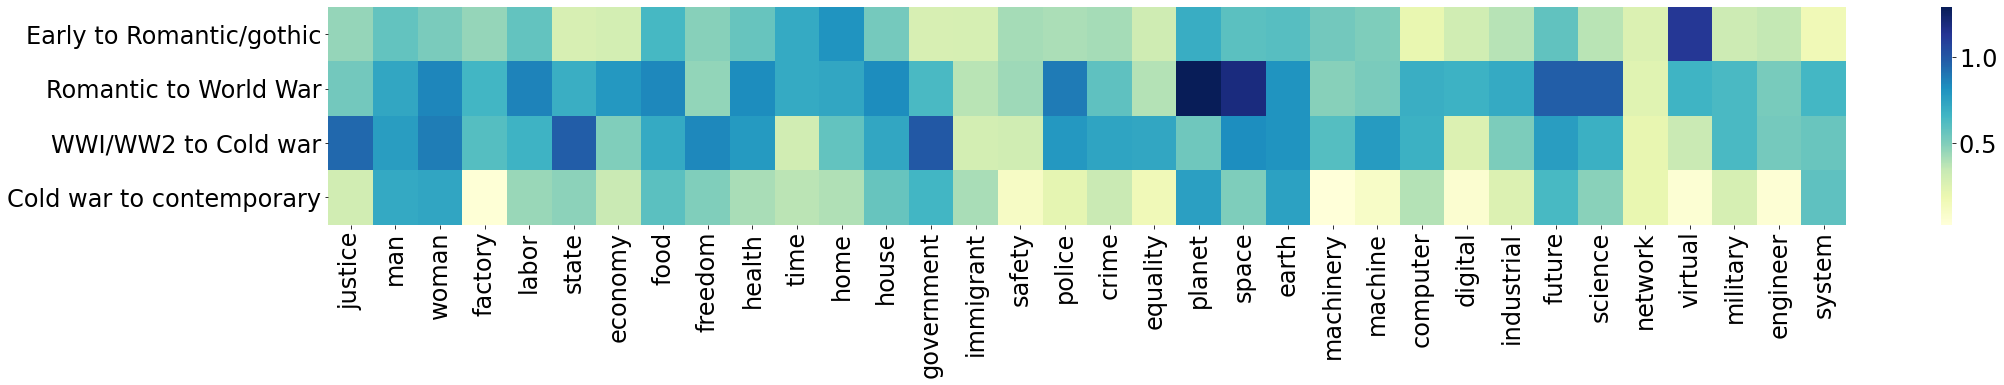

In [45]:
fig, ax = plt.subplots(figsize = (len(changes), len(cols)))
ax = sns.heatmap(changes_df.transpose(copy=True), ax = ax, cmap="YlGnBu")
x = ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 24)
y = ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 24)
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
plt.savefig("semantic_changes.pdf", bbox_inches = 'tight')
cbar.ax.tick_params(labelsize=24)

In [43]:
import seaborn as sns

In [221]:
eras = cols

In [89]:
import matplotlib.pyplot as plt

In [90]:
import seaborn
from sklearn import metrics

In [146]:
def heatmap_change_plot(targetWord = 'hello', cats=None):
    pltDF = getDivergenceDF(targetWord, comparedEmbeddings, cats=cats)
    fig, ax = plt.subplots(figsize = (10, 7))
    seaborn.heatmap(pltDF, ax = ax, annot = False, cmap="YlGnBu") #set annot True for a lot more information
    ax.set_xlabel("Starting period")
    ax.set_ylabel("Final period")
    ax.set_ylabel("Final period")
    ax.set_title("Period wise linguistic change for: '{}'".format(targetWord))
    plt.savefig("plots_change/" + targetWord + ".pdf")
    plt.show()

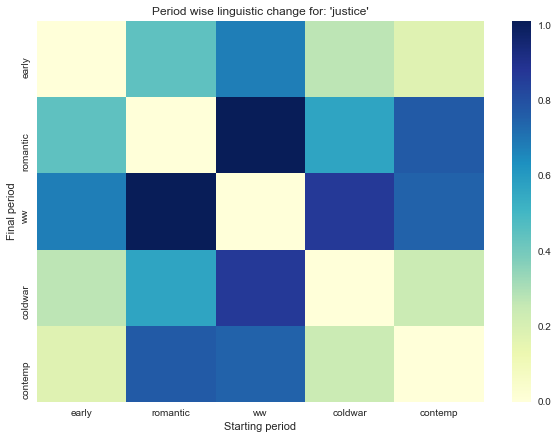

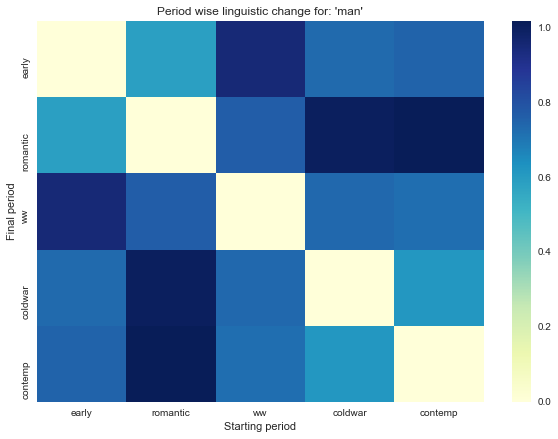

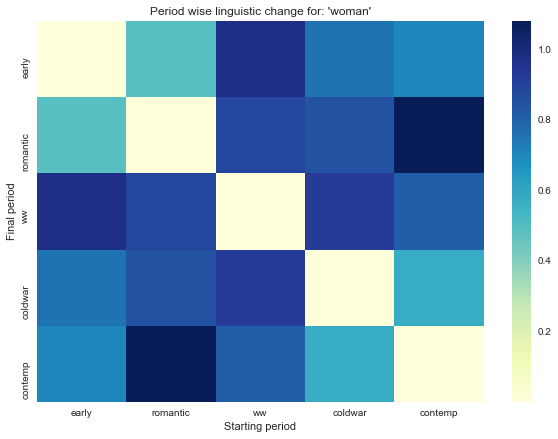

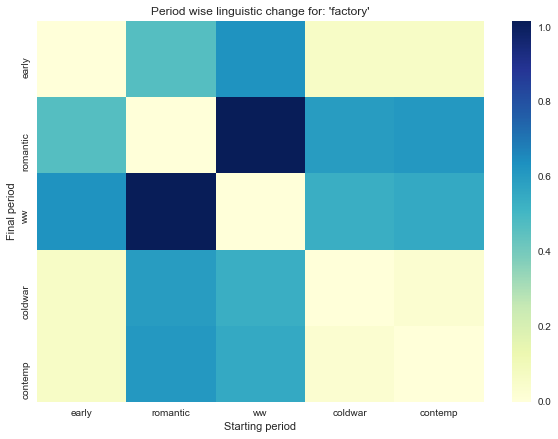

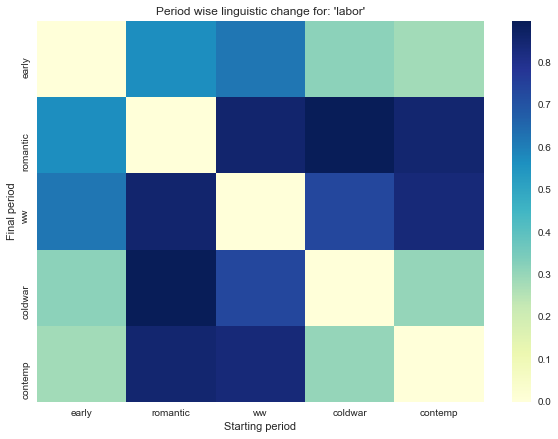

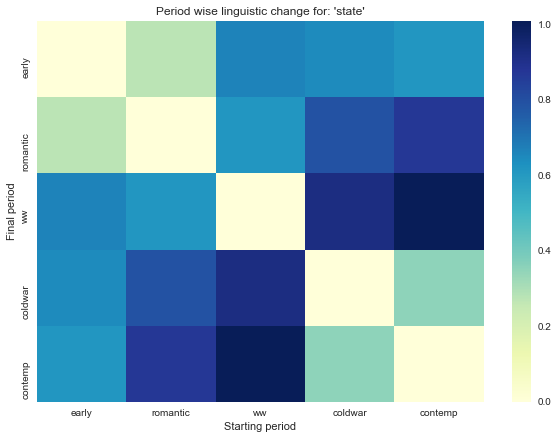

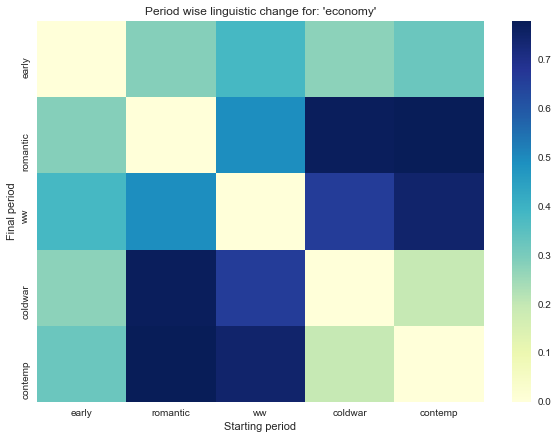

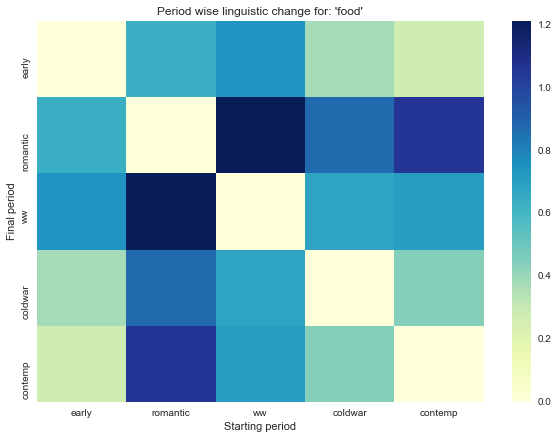

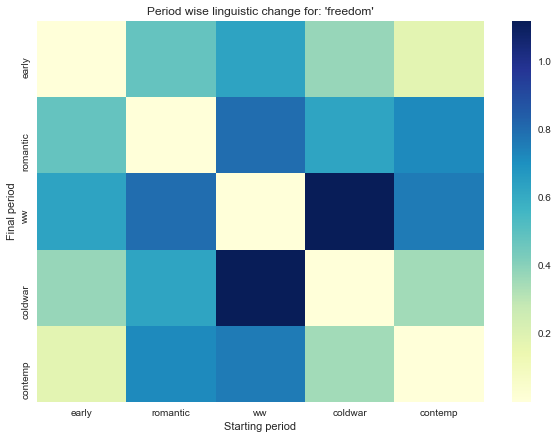

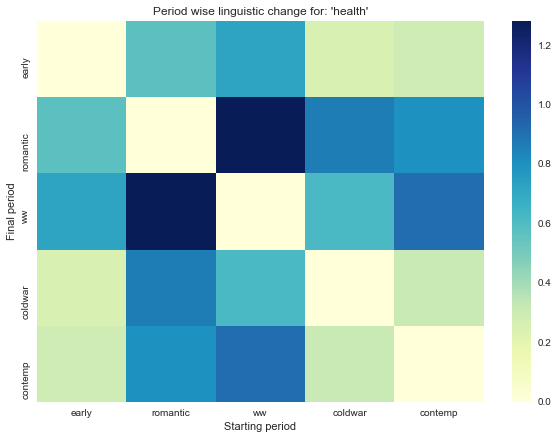

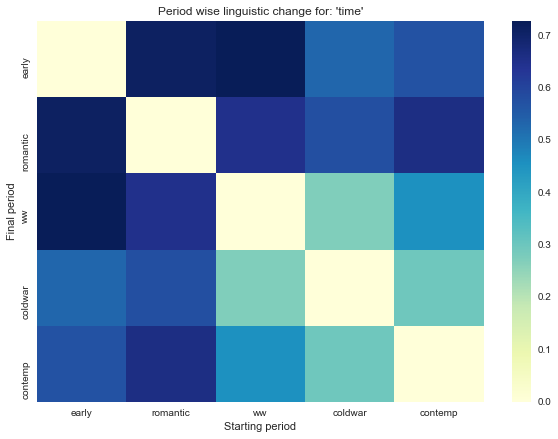

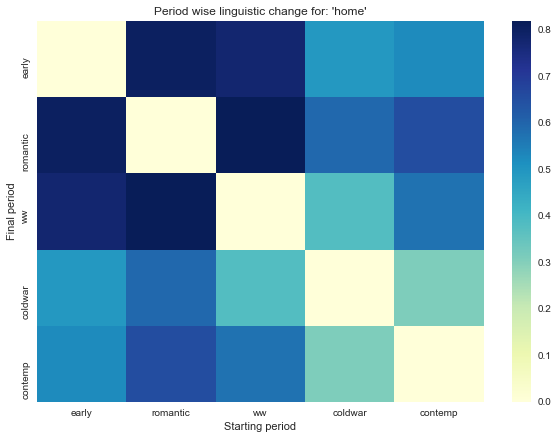

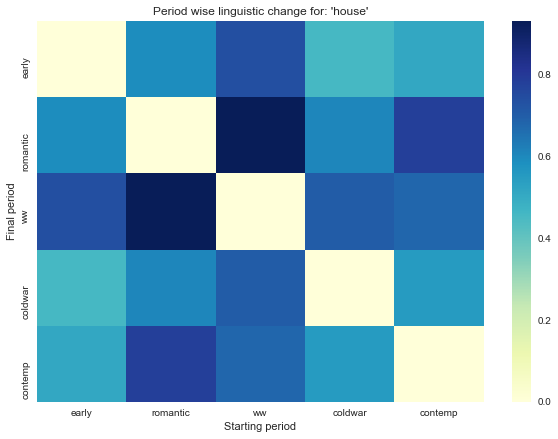

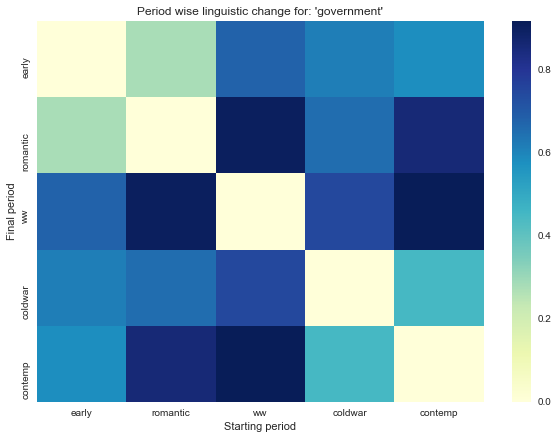

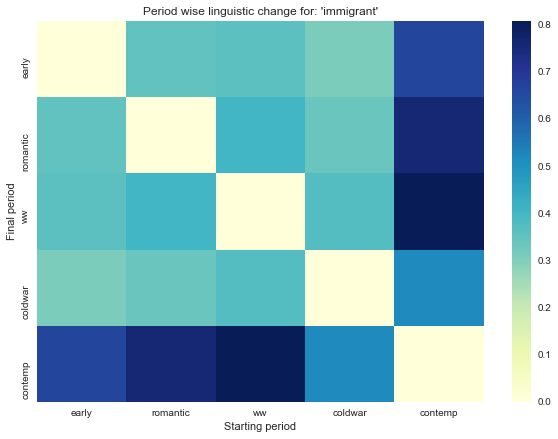

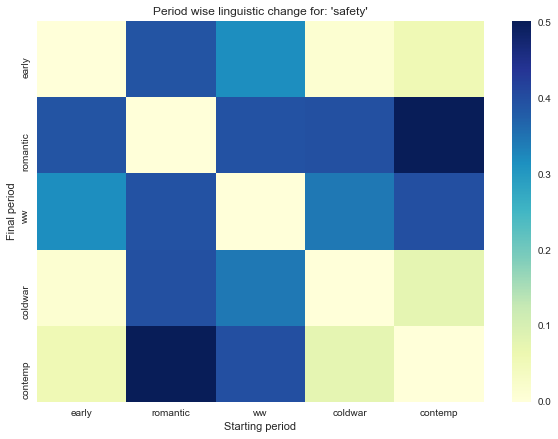

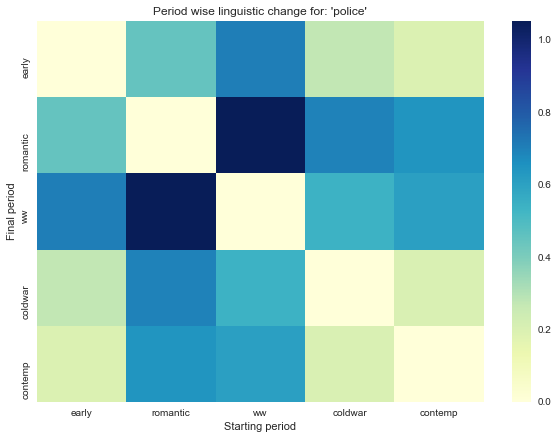

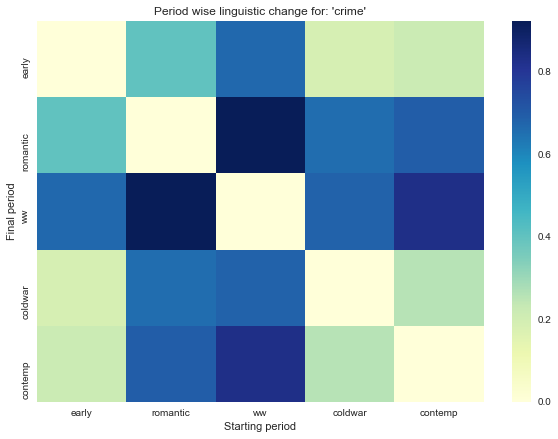

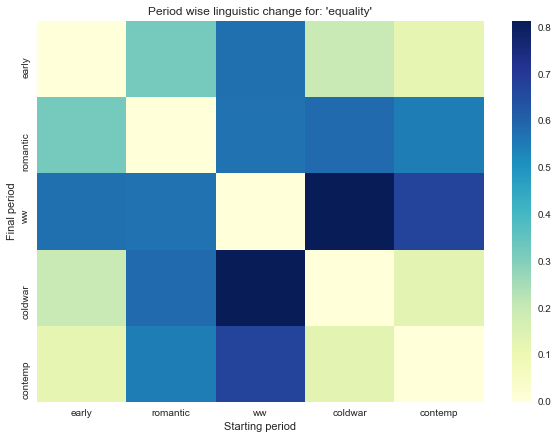

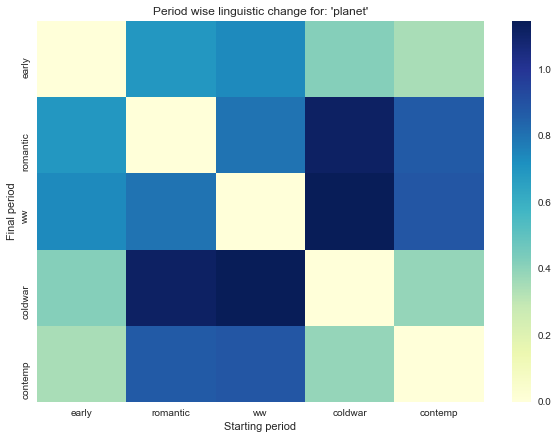

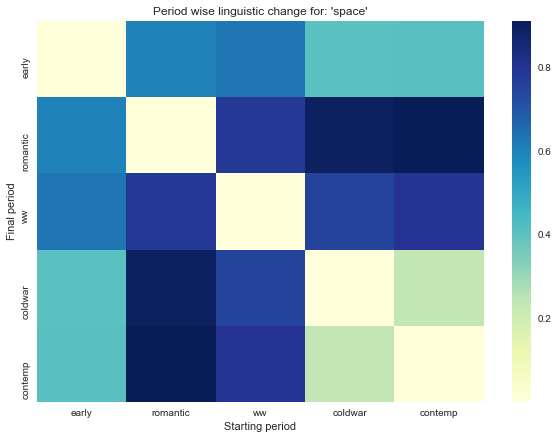

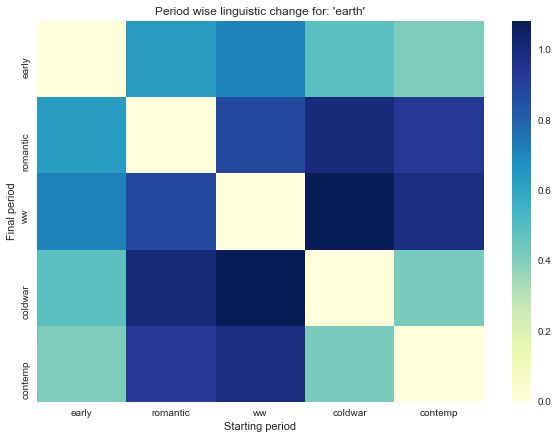

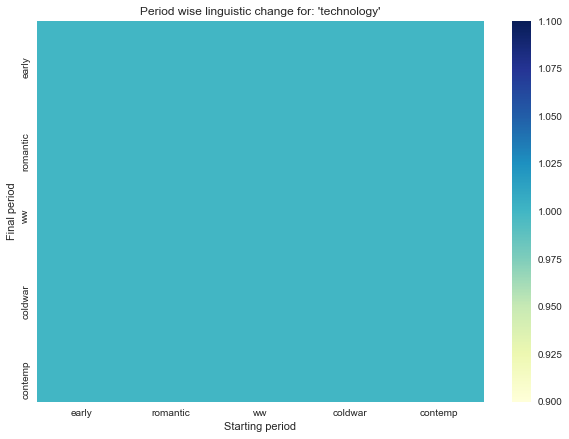

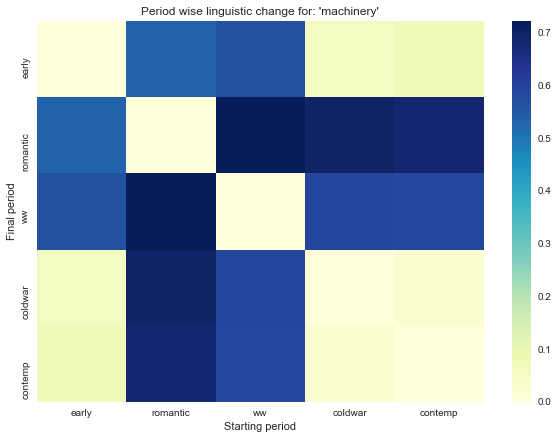

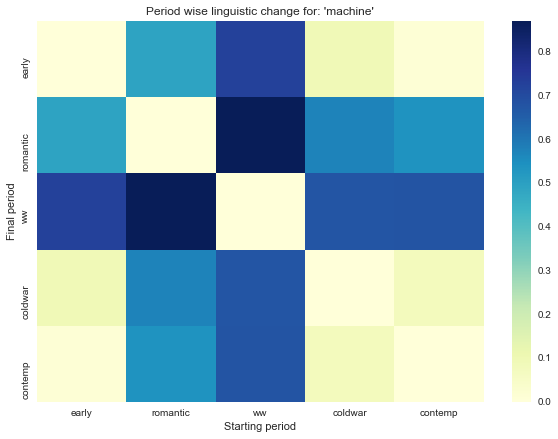

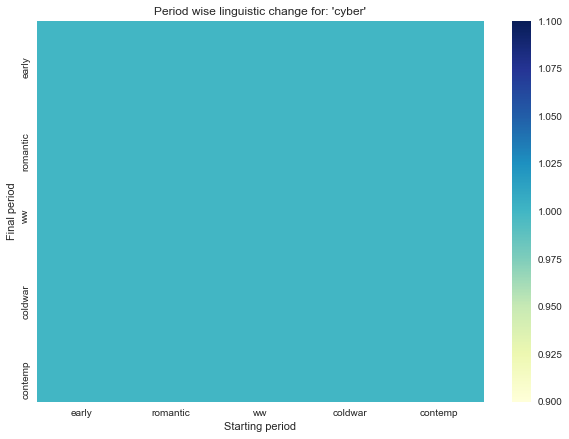

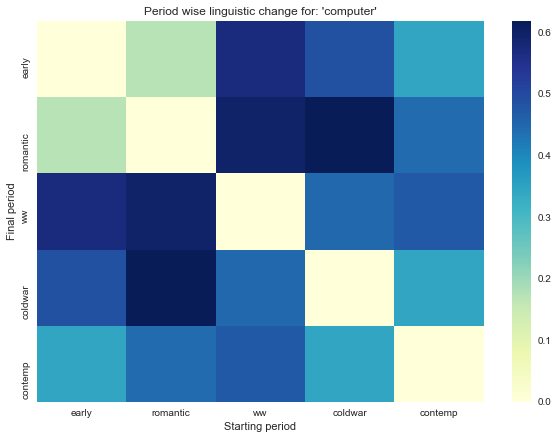

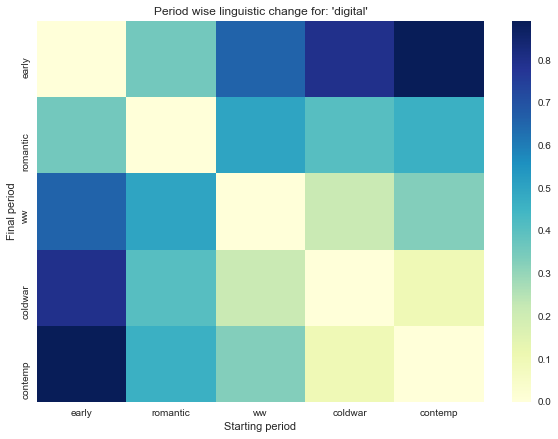

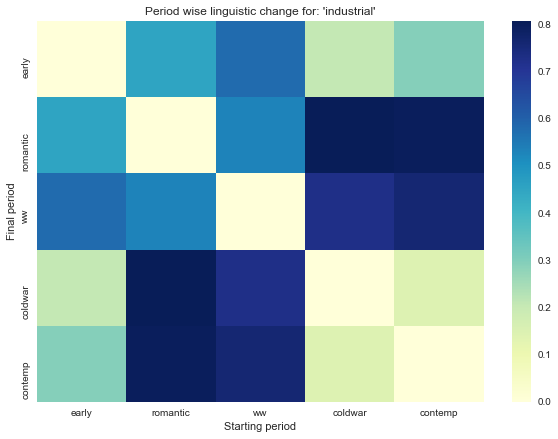

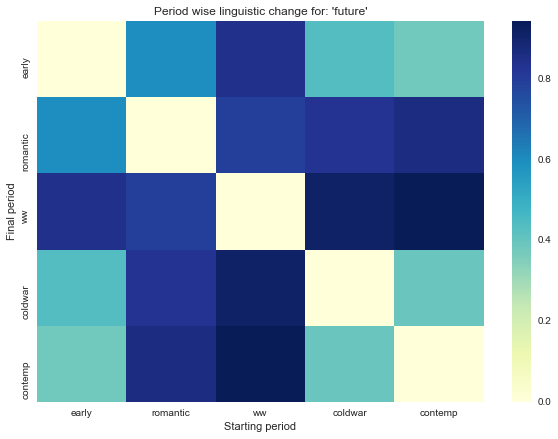

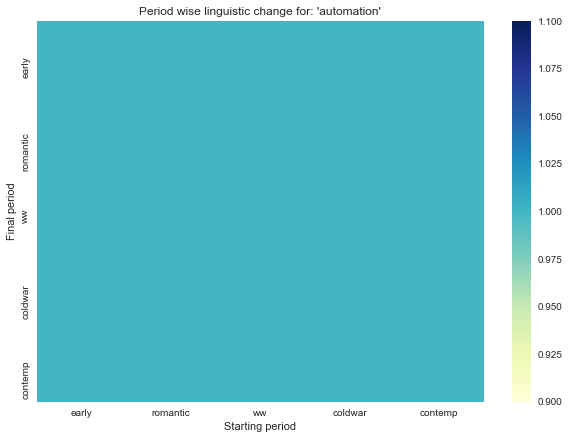

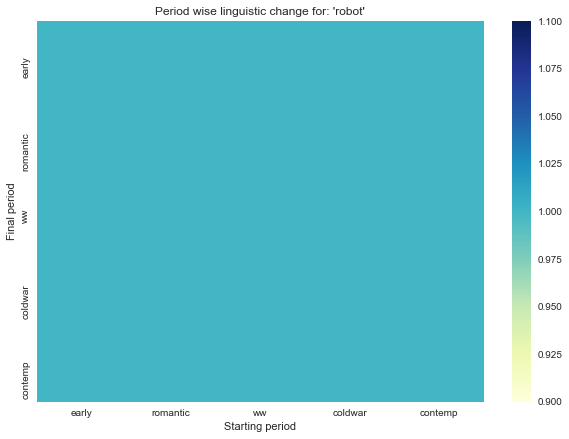

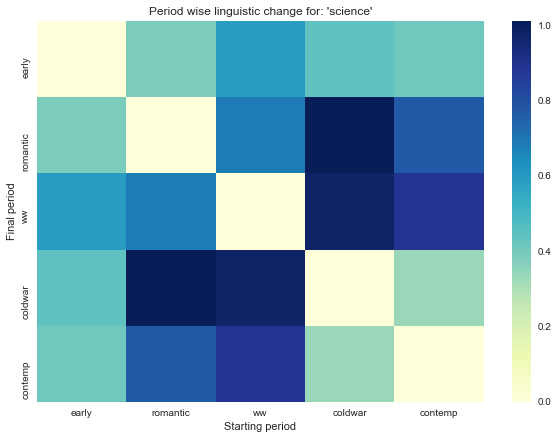

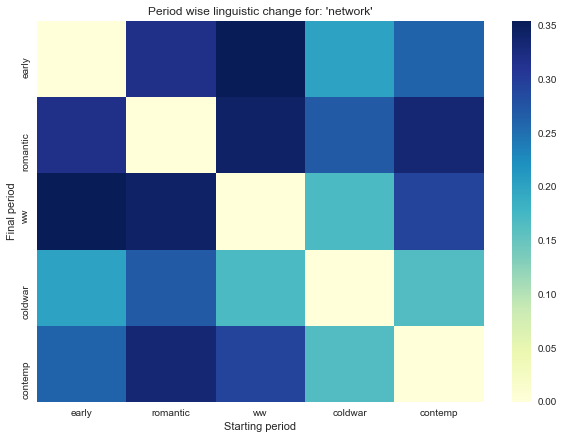

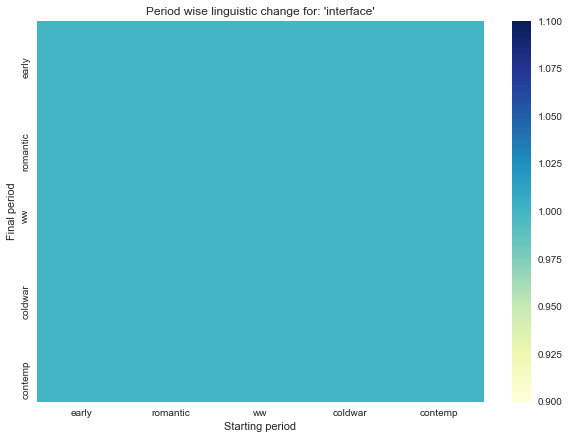

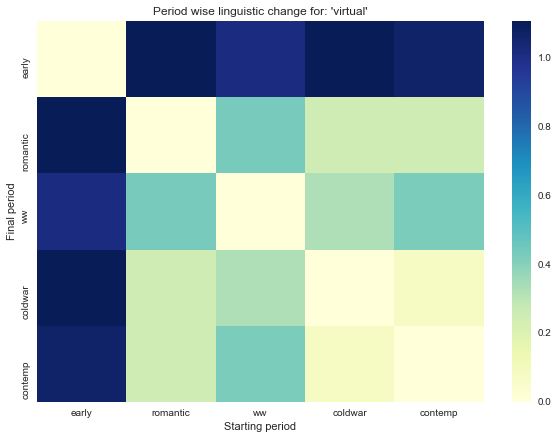

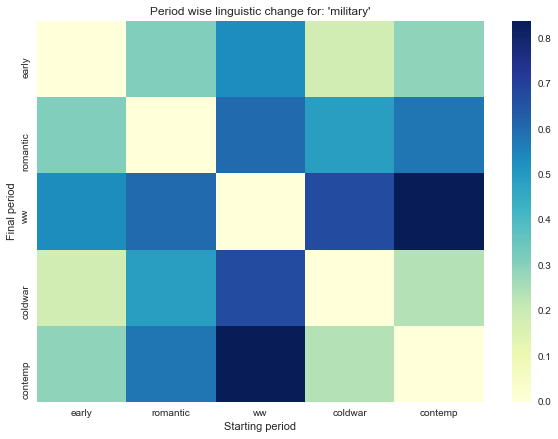

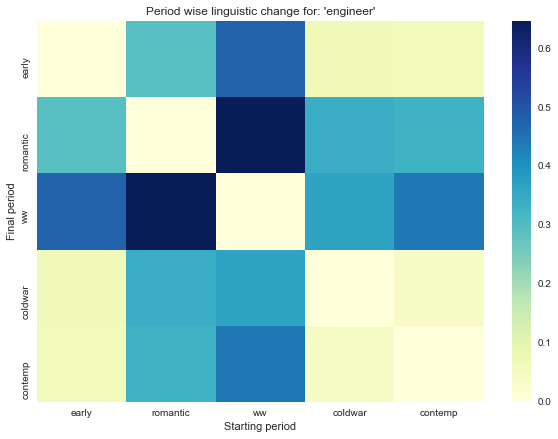

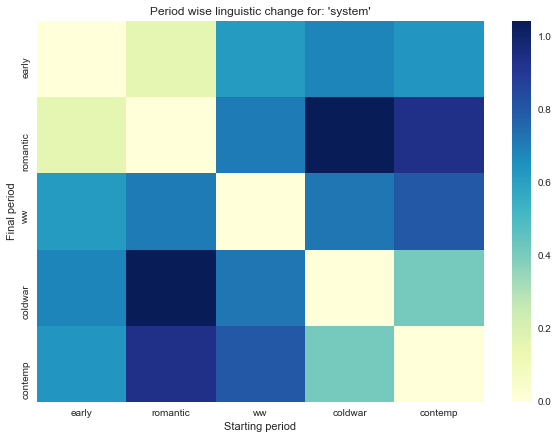

In [150]:
for word in search_words:
    try:
        heatmap_change_plot(word, cats=['early', 'romantic', 'ww', 'coldwar', 'contemp'])
    except KeyError:
        print(word)
        pass

In [ ]:
heatmap_change_plot()

In [104]:
import sklearn

In [109]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(embeddingsDict[cats[0]][0].wv[word].reshape(1, -1), embed.wv[word].reshape(1, -1))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.key_to_index.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [110]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 15249 words to compare


In [113]:
wordDivergences[:40]

[('chester', 7.190174907445908),
 ('stimulant', 7.078008830547333),
 ('meditations', 6.946235716342926),
 ('veloped', 6.920255243778229),
 ('understandings', 6.880540132522583),
 ('glaciers', 6.766161799430847),
 ('localized', 6.694883733987808),
 ('beauteous', 6.68212765455246),
 ('hun', 6.67378431558609),
 ('meditating', 6.665310084819794),
 ('sci', 6.597424566745758),
 ('protestants', 6.585931420326233),
 ('inferiors', 6.572189062833786),
 ('deeps', 6.503860950469971),
 ('queries', 6.464707970619202),
 ('knotty', 6.46405690908432),
 ('virgil', 6.454768598079681),
 ('koran', 6.389434797689319),
 ('prays', 6.389232397079468),
 ('polity', 6.308310508728027),
 ('abated', 6.298356771469116),
 ('journeyed', 6.284966766834259),
 ('multiplying', 6.278286695480347),
 ('trifles', 6.263824373483658),
 ('fiddle', 6.263771302998066),
 ('exhibitions', 6.157483592629433),
 ('dues', 6.115854263305664),
 ('ruffians', 6.0257594883441925),
 ('mimic', 6.007228195667267),
 ('niagara', 6.002925753593445)

In [114]:
wordDivergences[-40:]

[('turkey', 0.26392024755477905),
 ('advancing', 0.2623554468154907),
 ('obstructed', 0.2623082995414734),
 ('accounted', 0.261056125164032),
 ('diminishing', 0.26033520698547363),
 ('lays', 0.25754088163375854),
 ('resisted', 0.2561991214752197),
 ('displays', 0.25580787658691406),
 ('identified', 0.25483429431915283),
 ('unaware', 0.2540775537490845),
 ('urging', 0.24951833486557007),
 ('spells', 0.24939119815826416),
 ('confronted', 0.24937939643859863),
 ('suppressed', 0.2461848258972168),
 ('habitual', 0.24533593654632568),
 ('expose', 0.24483752250671387),
 ('adding', 0.24362623691558838),
 ('combat', 0.24214226007461548),
 ('damaged', 0.23926788568496704),
 ('failing', 0.23642265796661377),
 ('disturbing', 0.23199039697647095),
 ('mischievous', 0.2256375551223755),
 ('cautious', 0.22526031732559204),
 ('ap-', 0.22445982694625854),
 ('draws', 0.22309726476669312),
 ('executed', 0.22166472673416138),
 ('array', 0.2208659052848816),
 ('contrasted', 0.2194010615348816),
 ('implacabl